# Synthetic Data

## Dendrogram

We load the following data set:

In [ ]:
import numpy as np

X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])
X.size

20

and create a chart:

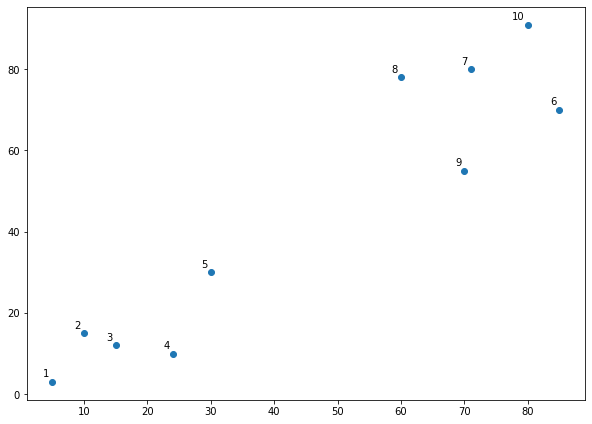

In [ ]:
import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

We want to merge the points in groups in an incremental way (*agglomerative hierarchy*) using the *Euclidean distance* as proximity index and the minimum distance between groups as reference (*single linkage*).

The `scipy` library is used to create a dendrogram that describes the whole process:

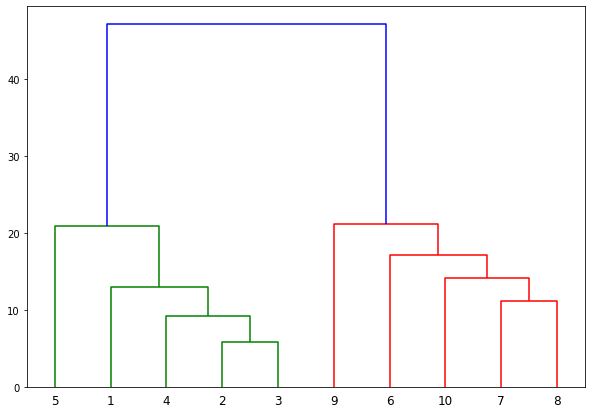

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, metric='euclidean', method='single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

## Model


Once we have analyzed the ***dendrogram***, we see that two groups would be sufficient. So let's create a model that builds two groups with the data.

First we need to import the following libraries:

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  


As before, we consider the Euclidean distance to measure the smallest distance between sets (single linkage):


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit(X)  

AgglomerativeClustering(linkage='single')

Now we can see how the model has assigned the clusters to each point:

In [ ]:
print(cluster.labels_)  

[1 1 1 1 1 0 0 0 0 0]


And visualize them through:

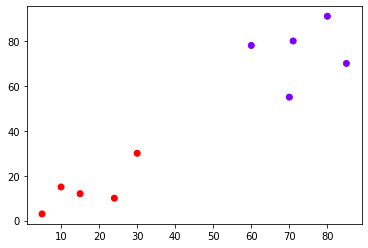

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  


# Real Data

Let's read a google sheet dataset that contains expenditure data associated with individuals (age, gender, expenditure, income) and it is available [here](https://drive.google.com/open?id=1Qj9QuFH2J6wjWIK6xdOMskBPu3oy7z9L).


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Load data into a `DataFrame`:

In [ ]:
import pandas as pd  

id = "1Qj9QuFH2J6wjWIK6xdOMskBPu3oy7z9L"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
customer_data = pd.read_csv('Filename.csv')
customer_data.shape

(200, 5)

The first rows can be displayed by means of:

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We use only numerical attributes: `Age`, `Annual Income` and `Spending Score` (columns 2, 3 and 4):

In [ ]:
data = customer_data.iloc[:, 2:5]

The data table now has the following size:

In [ ]:
data.shape

(200, 3)

## Dendrogram

So again we use `scipy` to create the dendogram from our dataset to discover the number of groups we are going to define in the model.

We use the `Euclidean` distance and `complete` method to join the groups:


In [ ]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


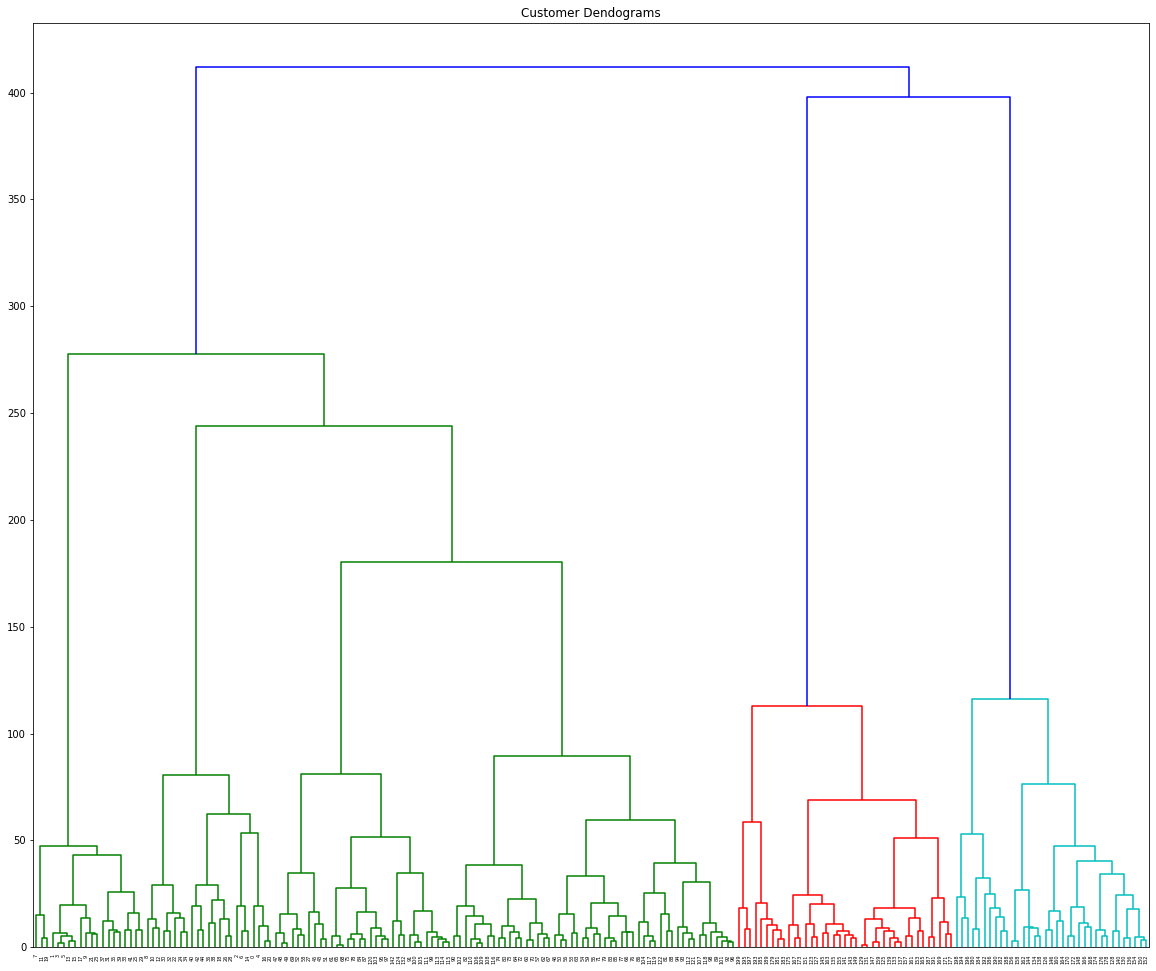

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 17))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='ward', metric='euclidean'))  

## Model

The dendogram shows 5 cohesive clusters before starting to join more dispersed clusters.

So, again, we use `AgglomerativeClustering` to create a hierarchical model with 5 clusters:

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit(data.values)  

AgglomerativeClustering(n_clusters=5)

The cluster assignment is:

In [ ]:
print(cluster.labels_)  

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


## Visualization in two-dimensional space

In order to visualize the data in a bi-dimensional space, we need to reduce the dimension of the original data_frame. 

We use the PCA method ( for now it is enough to know that this method allows to reduce the dimension of a table to *n* dimensions).

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)

And now we can project the data on a graph:

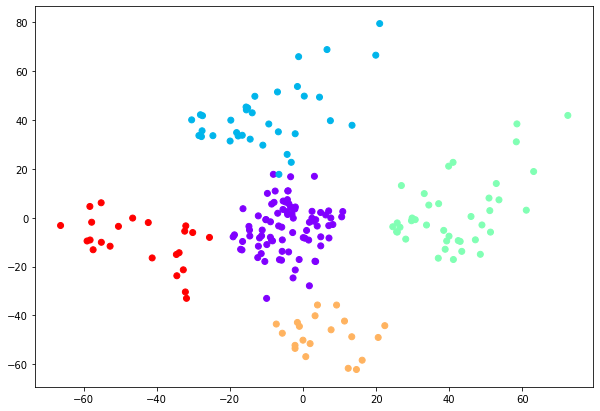

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 